# Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Acquire

* This dataset was downloaded from Kaggle at https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey
* I used the unencoded version of the data
* Each observation is a survey filled out by a Starbucks customer
* Each feature is a question asked in the survey or a timestamp for that survey
* This dataset contains 21 features and 122 observations

In [2]:
df = pd.read_csv('starbucks_survey.csv')

# Prepare

In [3]:
df.drop(columns='Timestamp', inplace=True)

df = df.rename(columns={'Timestamp':'time',
                        '1. Your Gender':'gender', 
                        '2. Your Age':'age_group',
                        '3. Are you currently....?':'employment_status', 
                        '4. What is your annual income?':'annual_income_group',
                        '5. How often do you visit Starbucks?':'visit_frequency',
                        '6. How do you usually enjoy Starbucks?':'dining_type',
                        '7. How much time do you normally  spend during your visit?':'visit_length',
                        '8. The nearest Starbucks\'s outlet to you is...?':'distance_away',
                        '9. Do you have Starbucks membership card?':'membership_card',
                        '10. What do you most frequently purchase at Starbucks?':'most_frequent_purchase',
                        '11. On average, how much would you spend at Starbucks per visit?':'spend_per_visit',
                        '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:':'brand_rating',
                        '13. How would you rate the price range at Starbucks?':'price_rating',
                        '14. How important are sales and promotions in your purchase decision?':'promotion_importance',
                        '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)':'ambiance_rating',
                        '16. You rate the WiFi quality at Starbucks as..':'wifi_rating',
                        '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)':'service_rating',
                        '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?':'gathering_likelyhood',
                        '19. How do you come to hear of promotions at Starbucks? Check all that apply.':'promotions_from',
                        '20. Will you continue buying at Starbucks?':'continue_buying'})

In [4]:
for col in df.columns:

    print(col)
    print('*********************************************')
    print(df[[col]].value_counts())
    print()

gender
*********************************************
gender
Female    65
Male      57
dtype: int64

age_group
*********************************************
age_group    
From 20 to 29    85
From 30 to 39    17
Below 20         13
40 and above      7
dtype: int64

employment_status
*********************************************
employment_status
Employed             61
Student              42
Self-employed        17
Housewife             2
dtype: int64

annual_income_group
*********************************************
annual_income_group  
Less than RM25,000       71
RM25,000 - RM50,000      25
RM50,000 - RM100,000     17
More than RM150,000       6
RM100,000 - RM150,000     3
dtype: int64

visit_frequency
*********************************************
visit_frequency
Rarely             76
Monthly            26
Never               9
Weekly              9
Daily               2
dtype: int64

dining_type
*********************************************
dining_type       
Take away             4

# Explore

### Part I: What are the customers characteristics?
* Gender
* Age
* Employment
* Income
* Frequency of Visit
* Distance from Nearist Starbucks
* spend_per_visit


### Part II: why do customers come to Starbucks?
* visit_frequency
* visit_length
* dining_type
* most_frequent_purchase
* promotion_importance
* gathering_likelyhood

### Part III: What do customers think of Starbucks?
* brand_rating
* price_rating
* ambiance_rating
* wifi_rating
* service_rating
* continue_buying

### Part IV: Miscellaneous
* membership_card
* promotions_from

## Part I: What are the customers characteristics?

#### What is the gender distribution of Starbucks customers?

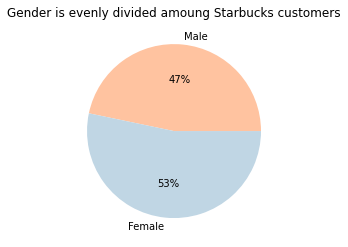

In [7]:
    # set values and labels for chart
    values = [len(df.gender[df.gender == 'Male']), len(df.gender[df.gender == 'Female'])]
    labels = ['Male','Female'] 

    # generate and show chart
    plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
    plt.title('Gender is evenly divided amoung Starbucks customers')
    plt.show()

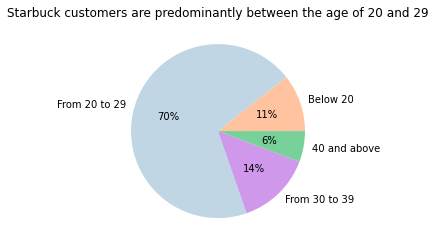

In [12]:
    # set values and labels for chart
    values = [len(df.age_group[df.age_group == 'Below 20']), 
              len(df.age_group[df.age_group == 'From 20 to 29']),
              len(df.age_group[df.age_group == 'From 30 to 39']),
              len(df.age_group[df.age_group == '40 and above'])]
    
    labels = ['Below 20','From 20 to 29', 'From 30 to 39', '40 and above'] 

    # generate and show chart
    plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4', '#cf98eb', '#77d198'])
    plt.title('Starbuck customers are predominantly between the age of 20 and 29')
    plt.show()

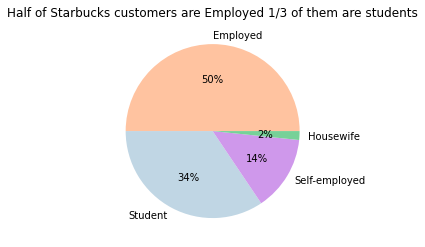

In [13]:
    # set values and labels for chart
    values = [len(df.employment_status[df.employment_status == 'Employed']), 
              len(df.employment_status[df.employment_status == 'Student']),
              len(df.employment_status[df.employment_status == 'Self-employed']),
              len(df.employment_status[df.employment_status == 'Housewife'])]
    
    labels = ['Employed','Student', 'Self-employed', 'Housewife'] 

    # generate and show chart
    plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4', '#cf98eb', '#77d198'])
    plt.title('Half of Starbucks customers are Employed 1/3 of them are students')
    plt.show()

In [ ]:
Employed             61
Student              42
Self-employed        17
Housewife             2